## Telecom Churn

### Business Problem

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, **customer retention** has now become even more important than customer acquisition.

For many incumbent operators, *retaining high profitable customers is the number one business goal*.

To reduce customer churn, telecom companies need to **predict which customers are at high risk of churn**.

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

### Understanding Customer Behaviour During Churn

Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are **three phases** of customer lifecycle :

1. The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

2. The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

3. The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

In [7]:
# Importing necessary libraries
import numpy as np
import pandas as pd

import datetime as dt

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
sns.set(style="ticks")
%matplotlib inline

from scipy.stats import norm
from scipy import stats

import sklearn
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore") 

In [9]:
# Reading data
data = pd.read_csv("telecom_churn_data.csv")
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [10]:
data.head() 

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

### Understanding and Defining Churn

There are two main models of payment in the telecom industry - **postpaid** (customers pay a monthly/annual bill after using the services) and **prepaid** (customers pay/recharge with a certain amount in advance and then use the services).

In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.

However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).

Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.  Also, prepaid is the most common model in India and southeast Asia, while postpaid is more common in Europe in North America.

This project is based on the Indian and Southeast Asian market.

In [11]:
# Getting mean of good phase
data['total_data_rech_6'] = data['total_rech_data_6'] * data['av_rech_amt_data_6']
data['total_data_rech_7'] = data['total_rech_data_7'] * data['av_rech_amt_data_7']

data['amt_data_6'] = data[['total_rech_amt_6','total_data_rech_6']].sum(axis=1)
data['amt_data_7'] = data[['total_rech_amt_7','total_data_rech_7']].sum(axis=1)

data['AVG_amt_data_6_7'] = data[['amt_data_6','amt_data_7']].mean(axis=1) 

In [12]:
data.head() 

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7,AVG_amt_data_6_7
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,N

In [13]:
data[['total_rech_amt_6','total_rech_amt_7','AVG_amt_data_6_7']].quantile(np.linspace(.1, 1, 9, 0)) 

,total_rech_amt_6,total_rech_amt_7,AVG_amt_data_6_7
0.1,0.0,0.0,60.0
0.2,80.0,65.0,108.5
0.3,120.0,110.0,155.0
0.4,170.0,160.0,209.5
0.5,230.0,220.0,275.0
0.6,290.0,283.0,360.0
0.7,378.0,370.0,478.0
0.8,504.0,500.0,656.5
0.9,732.0,731.0,1028.0


As per the definition of high value customers are those whose recharge amount should be more than or equal to 70th percentile. 

In [14]:
df = data[(data['AVG_amt_data_6_7']> data['AVG_amt_data_6_7'].quantile(0.7))]
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Columns: 231 entries, mobile_number to AVG_amt_data_6_7
dtypes: float64(184), int64(35), object(12)
memory usage: 53.0+ MB


### Churn customers
<br>
Identifying churn high value customers based on the last month i.e. month 9 

In [15]:
df['churn_flag'] = np.where(
                            ((df['total_ic_mou_9'] == 0.00) | (df['total_og_mou_9'] == 0.00))
                            & ((df['vol_2g_mb_9'] == 0.00) | (df['vol_3g_mb_9'] == 0.00))
                            , 1, 0
                           ) 

In [18]:
df['churn_flag'].value_counts() 

0    26698
1     3255
Name: churn_flag, dtype: int64

In [19]:
df['churn_flag'].value_counts()/df.shape[0] 

0    0.89133
1    0.10867
Name: churn_flag, dtype: float64

In [20]:
# Dropping features related to the churn phase
df = df.drop(df.filter(regex='_9|sep', axis = 1).columns, axis=1) 

In [21]:
df.info(verbose=True, null_counts=True) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 177 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mobile_number             29953 non-null  int64  
 1   circle_id                 29953 non-null  int64  
 2   loc_og_t2o_mou            29730 non-null  float64
 3   std_og_t2o_mou            29730 non-null  float64
 4   loc_ic_t2o_mou            29730 non-null  float64
 5   last_date_of_month_6      29953 non-null  object 
 6   last_date_of_month_7      29926 non-null  object 
 7   last_date_of_month_8      29788 non-null  object 
 8   arpu_6                    29953 non-null  float64
 9   arpu_7                    29953 non-null  float64
 10  arpu_8                    29953 non-null  float64
 11  onnet_mou_6               29411 non-null  float64
 12  onnet_mou_7               29417 non-null  float64
 13  onnet_mou_8               28781 non-null  float64
 14  offne

In [22]:
# Checking Nan values
df.isna().sum() 

mobile_number                   0
circle_id                       0
loc_og_t2o_mou                223
std_og_t2o_mou                223
loc_ic_t2o_mou                223
last_date_of_month_6            0
last_date_of_month_7           27
last_date_of_month_8          165
arpu_6                          0
arpu_7                          0
arpu_8                          0
onnet_mou_6                   542
onnet_mou_7                   536
onnet_mou_8                  1172
offnet_mou_6                  542
offnet_mou_7                  536
offnet_mou_8                 1172
roam_ic_mou_6                 542
roam_ic_mou_7                 536
roam_ic_mou_8                1172
roam_og_mou_6                 542
roam_og_mou_7                 536
roam_og_mou_8                1172
loc_og_t2t_mou_6              542
loc_og_t2t_mou_7              536
loc_og_t2t_mou_8             1172
loc_og_t2m_mou_6              542
loc_og_t2m_mou_7              536
loc_og_t2m_mou_8             1172
loc_og_t2f_mou

Let's have a look at missing values i.e. how many are there & also get their percencentages

In [23]:
pd.options.display.float_format = '{:.2f}'.format
missing_values = pd.DataFrame((df.isnull().sum()/len(df))*100).reset_index().rename(columns = {'index': 'feature', 0: 'Missing%'}).sort_values('Missing%',ascending = False)
missing_values

,feature,Missing%
145,arpu_3g_8,46.80
151,night_pck_user_8,46.80
121,date_of_last_rech_data_8,46.80
127,max_rech_data_8,46.80
130,count_rech_2g_8,46.80
133,count_rech_3g_8,46.80
136,av_rech_amt_data_8,46.80
124,total_rech_data_8,46.80
166,fb_user_8,46.80
148,arpu_2g_8,46.80


Before treating these missing values, let's identify features with single or unique value, because they won't be significant. We will drop them.

In [24]:
unique_stats = pd.DataFrame(df.nunique()).reset_index().rename(columns = {'index': 'feature', 0: 'nunique'})
print(unique_stats[unique_stats['nunique'] == 1])

print('%d features with a single unique value.\n' % len(unique_stats[unique_stats['nunique'] == 1])) 

                 feature  nunique
1              circle_id        1
2         loc_og_t2o_mou        1
3         std_og_t2o_mou        1
4         loc_ic_t2o_mou        1
5   last_date_of_month_6        1
6   last_date_of_month_7        1
7   last_date_of_month_8        1
47      std_og_t2c_mou_6        1
48      std_og_t2c_mou_7        1
49      std_og_t2c_mou_8        1
86      std_ic_t2o_mou_6        1
87      std_ic_t2o_mou_7        1
88      std_ic_t2o_mou_8        1
13 features with a single unique value.



In [25]:
# Drop these columns
df = df.drop(columns = list(unique_stats[unique_stats['nunique'] == 1]['feature'])) 

### Missing value treatment

In [26]:
df['arpu_3g_8'].isna().sum() 

14018

In [27]:
df['arpu_3g_8'].describe() 

count   15935.00
mean      118.11
std       218.98
min       -24.49
25%         0.00
50%        10.02
75%       179.63
max      3716.90
Name: arpu_3g_8, dtype: float64

We can observe that the range is huge. We can't go with either mean or median as they can skew/distort the whole scenario. Let's check data related variables of 8th month to decide on filling up the missing values 

In [28]:
df[df['arpu_3g_8'].isna()][['date_of_last_rech_data_8','total_rech_data_8','max_rech_data_8','count_rech_2g_8', 
                            'count_rech_3g_8', 'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'arpu_2g_8',
                            'night_pck_user_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8',
                            'fb_user_8'
                           ]].nunique() 

date_of_last_rech_data_8    0
total_rech_data_8           0
max_rech_data_8             0
count_rech_2g_8             0
count_rech_3g_8             0
av_rech_amt_data_8          0
vol_2g_mb_8                 1
vol_3g_mb_8                 1
arpu_2g_8                   0
night_pck_user_8            0
monthly_2g_8                1
sachet_2g_8                 1
monthly_3g_8                1
sachet_3g_8                 1
fb_user_8                   0
dtype: int64

In [29]:
df[df['arpu_3g_8'].isna()][['date_of_last_rech_data_8','total_rech_data_8','max_rech_data_8','count_rech_2g_8', 
                            'count_rech_3g_8', 'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'arpu_2g_8',
                            'night_pck_user_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8',
                            'fb_user_8'
                           ]].head() 

,date_of_last_rech_data_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_2g_8,night_pck_user_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_8
7,NaN,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,0,0,0,0,nan
21,NaN,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,0,0,0,0,nan
38,NaN,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,0,0,0,0,nan
41,NaN,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,0,0,0,0,nan
48,NaN,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,0,0,0,0,nan


In [30]:
pd.options.display.float_format = '{:.2f}'.format
missing_values = pd.DataFrame((df.isnull().sum()/len(df))*100).reset_index().rename(columns = {'index': 'feature', 0: 'Missing%'}).sort_values('Missing%',ascending = False)
missing_values 

,feature,Missing%
135,arpu_2g_8,46.80
120,count_rech_3g_8,46.80
132,arpu_3g_8,46.80
153,fb_user_8,46.80
108,date_of_last_rech_data_8,46.80
111,total_rech_data_8,46.80
138,night_pck_user_8,46.80
123,av_rech_amt_data_8,46.80
114,max_rech_data_8,46.80
117,count_rech_2g_8,46.80


Some columns have a very low null percentage. Let's delete those records.

In [39]:
df = df.dropna(axis=0, subset=['loc_og_t2m_mou_8']) 
df = df.dropna(axis=0, subset=['spl_og_mou_8']) 
df = df.dropna(axis=0, subset=['spl_ic_mou_8']) 
df = df.dropna(axis=0, subset=['og_others_8']) 
df = df.dropna(axis=0, subset=['std_ic_mou_8']) 
df = df.dropna(axis=0, subset=['roam_og_mou_8']) 
df = df.dropna(axis=0, subset=['loc_og_t2c_mou_8']) 
df = df.dropna(axis=0, subset=['std_ic_t2f_mou_8']) 
df = df.dropna(axis=0, subset=['loc_ic_t2t_mou_8']) 
df = df.dropna(axis=0, subset=['std_ic_t2m_mou_8']) 

In [40]:
df = df.dropna(axis=0, subset=['loc_ic_t2m_mou_8']) 
df = df.dropna(axis=0, subset=['std_ic_t2t_mou_8']) 
df = df.dropna(axis=0, subset=['loc_ic_t2f_mou_8']) 
df = df.dropna(axis=0, subset=['isd_ic_mou_8']) 
df = df.dropna(axis=0, subset=['offnet_mou_8']) 
df = df.dropna(axis=0, subset=['isd_og_mou_8']) 
df = df.dropna(axis=0, subset=['ic_others_8']) 
df = df.dropna(axis=0, subset=['loc_og_mou_8']) 
df = df.dropna(axis=0, subset=['loc_ic_mou_8']) 
df = df.dropna(axis=0, subset=['std_og_t2t_mou_8'])  

In [41]:
pd.options.display.float_format = '{:.2f}'.format
missing_values = pd.DataFrame((df.isnull().sum()/len(df))*100).reset_index().rename(columns = {'index': 'feature', 0: 'Missing%'}).sort_values('Missing%',ascending = False)
missing_values 

,feature,Missing%
117,count_rech_2g_8,45.68
114,max_rech_data_8,45.68
111,total_rech_data_8,45.68
132,arpu_3g_8,45.68
123,av_rech_amt_data_8,45.68
108,date_of_last_rech_data_8,45.68
138,night_pck_user_8,45.68
135,arpu_2g_8,45.68
120,count_rech_3g_8,45.68
153,fb_user_8,45.68


In [42]:
df = df.dropna(axis=0, subset=['date_of_last_rech_8']) 
df = df.dropna(axis=0, subset=['loc_ic_t2t_mou_6']) 
df = df.dropna(axis=0, subset=['loc_ic_t2m_mou_6']) 
df = df.dropna(axis=0, subset=['loc_ic_t2f_mou_6']) 
df = df.dropna(axis=0, subset=['loc_ic_mou_6']) 
df = df.dropna(axis=0, subset=['isd_ic_mou_6']) 
df = df.dropna(axis=0, subset=['std_ic_t2t_mou_6']) 
df = df.dropna(axis=0, subset=['std_ic_t2m_mou_6']) 
df = df.dropna(axis=0, subset=['std_ic_t2f_mou_6']) 
df = df.dropna(axis=0, subset=['std_ic_mou_6'])  

In [44]:
df = df.dropna(axis=0, subset=['spl_og_mou_6']) 
df = df.dropna(axis=0, subset=['ic_others_6']) 
df = df.dropna(axis=0, subset=['og_others_6']) 
df = df.dropna(axis=0, subset=['spl_ic_mou_6']) 
df = df.dropna(axis=0, subset=['offnet_mou_6']) 
df = df.dropna(axis=0, subset=['loc_og_t2t_mou_6']) 
df = df.dropna(axis=0, subset=['loc_og_t2f_mou_6']) 
df = df.dropna(axis=0, subset=['loc_og_mou_6']) 
df = df.dropna(axis=0, subset=['std_og_t2t_mou_6']) 
df = df.dropna(axis=0, subset=['std_og_t2m_mou_6'])  

In [45]:
pd.options.display.float_format = '{:.2f}'.format
missing_values = pd.DataFrame((df.isnull().sum()/len(df))*100).reset_index().rename(columns = {'index': 'feature', 0: 'Missing%'}).sort_values('Missing%',ascending = False)
missing_values 

,feature,Missing%
114,max_rech_data_8,45.23
138,night_pck_user_8,45.23
153,fb_user_8,45.23
120,count_rech_3g_8,45.23
111,total_rech_data_8,45.23
117,count_rech_2g_8,45.23
135,arpu_2g_8,45.23
132,arpu_3g_8,45.23
108,date_of_last_rech_data_8,45.23
123,av_rech_amt_data_8,45.23


In [46]:
df = df.dropna(axis=0, subset=['loc_ic_t2m_mou_7']) 
df = df.dropna(axis=0, subset=['std_ic_t2m_mou_7']) 
df = df.dropna(axis=0, subset=['std_ic_t2f_mou_7']) 
df = df.dropna(axis=0, subset=['std_ic_t2t_mou_7']) 
df = df.dropna(axis=0, subset=['loc_ic_t2t_mou_7']) 
df = df.dropna(axis=0, subset=['loc_ic_t2f_mou_7']) 
df = df.dropna(axis=0, subset=['isd_og_mou_7']) 
df = df.dropna(axis=0, subset=['og_others_7']) 
df = df.dropna(axis=0, subset=['loc_ic_mou_7']) 
df = df.dropna(axis=0, subset=['spl_og_mou_7'])   

In [47]:
df = df.dropna(axis=0, subset=['std_og_mou_7']) 
df = df.dropna(axis=0, subset=['loc_og_t2m_mou_7']) 
df = df.dropna(axis=0, subset=['onnet_mou_7']) 
df = df.dropna(axis=0, subset=['offnet_mou_7']) 
df = df.dropna(axis=0, subset=['ic_others_7']) 
df = df.dropna(axis=0, subset=['roam_ic_mou_7']) 
df = df.dropna(axis=0, subset=['roam_og_mou_7']) 
df = df.dropna(axis=0, subset=['std_og_t2f_mou_7']) 
df = df.dropna(axis=0, subset=['isd_ic_mou_7']) 
df = df.dropna(axis=0, subset=['loc_og_t2t_mou_7'])  

In [48]:
pd.options.display.float_format = '{:.2f}'.format
missing_values = pd.DataFrame((df.isnull().sum()/len(df))*100).reset_index().rename(columns = {'index': 'feature', 0: 'Missing%'}).sort_values('Missing%',ascending = False)
missing_values 

,feature,Missing%
123,av_rech_amt_data_8,45.27
153,fb_user_8,45.27
114,max_rech_data_8,45.27
117,count_rech_2g_8,45.27
120,count_rech_3g_8,45.27
108,date_of_last_rech_data_8,45.27
132,arpu_3g_8,45.27
135,arpu_2g_8,45.27
138,night_pck_user_8,45.27
111,total_rech_data_8,45.27


In [50]:
df = df.dropna(axis=0, subset=['date_of_last_rech_7'])
df = df.dropna(axis=0, subset=['date_of_last_rech_6'])  

In [51]:
pd.options.display.float_format = '{:.2f}'.format
missing_values = pd.DataFrame((df.isnull().sum()/len(df))*100).reset_index().rename(columns = {'index': 'feature', 0: 'Missing%'}).sort_values('Missing%',ascending = False)
missing_values 

,feature,Missing%
123,av_rech_amt_data_8,45.22
153,fb_user_8,45.22
114,max_rech_data_8,45.22
117,count_rech_2g_8,45.22
120,count_rech_3g_8,45.22
108,date_of_last_rech_data_8,45.22
132,arpu_3g_8,45.22
135,arpu_2g_8,45.22
138,night_pck_user_8,45.22
111,total_rech_data_8,45.22


Let's impute the null values with the mode of the column.

In [52]:
df['av_rech_amt_data_8'] = df['av_rech_amt_data_8'].fillna(df['av_rech_amt_data_8'].mode()[0]) 
df['fb_user_8'] = df['fb_user_8'].fillna(df['fb_user_8'].mode()[0]) 
df['max_rech_data_8'] = df['max_rech_data_8'].fillna(df['max_rech_data_8'].mode()[0]) 
df['count_rech_2g_8'] = df['count_rech_2g_8'].fillna(df['count_rech_2g_8'].mode()[0]) 
df['count_rech_3g_8'] = df['count_rech_3g_8'].fillna(df['count_rech_3g_8'].mode()[0]) 
df['date_of_last_rech_data_8'] = df['date_of_last_rech_data_8'].fillna(df['date_of_last_rech_data_8'].mode()[0]) 
df['arpu_3g_8'] = df['arpu_3g_8'].fillna(df['arpu_3g_8'].mode()[0]) 
df['arpu_2g_8'] = df['arpu_2g_8'].fillna(df['arpu_2g_8'].mode()[0]) 
df['night_pck_user_8'] = df['night_pck_user_8'].fillna(df['night_pck_user_8'].mode()[0]) 
df['total_rech_data_8'] = df['total_rech_data_8'].fillna(df['total_rech_data_8'].mode()[0]) 

In [53]:
df['total_data_rech_6'] = df['total_data_rech_6'].fillna(df['total_data_rech_6'].mode()[0]) 
df['count_rech_3g_6'] = df['count_rech_3g_6'].fillna(df['count_rech_3g_6'].mode()[0]) 
df['arpu_2g_6'] = df['arpu_2g_6'].fillna(df['arpu_2g_6'].mode()[0]) 
df['arpu_3g_6'] = df['arpu_3g_6'].fillna(df['arpu_3g_6'].mode()[0]) 
df['date_of_last_rech_data_6'] = df['date_of_last_rech_data_6'].fillna(df['date_of_last_rech_data_6'].mode()[0]) 
df['total_rech_data_6'] = df['total_rech_data_6'].fillna(df['total_rech_data_6'].mode()[0]) 
df['av_rech_amt_data_6'] = df['av_rech_amt_data_6'].fillna(df['av_rech_amt_data_6'].mode()[0]) 
df['count_rech_2g_6'] = df['count_rech_2g_6'].fillna(df['count_rech_2g_6'].mode()[0]) 
df['fb_user_6'] = df['fb_user_6'].fillna(df['fb_user_6'].mode()[0]) 
df['max_rech_data_6'] = df['max_rech_data_6'].fillna(df['max_rech_data_6'].mode()[0]) 

In [54]:
pd.options.display.float_format = '{:.2f}'.format
missing_values = pd.DataFrame((df.isnull().sum()/len(df))*100).reset_index().rename(columns = {'index': 'feature', 0: 'Missing%'}).sort_values('Missing%',ascending = False)
missing_values 

,feature,Missing%
136,night_pck_user_6,44.24
110,total_rech_data_7,42.72
113,max_rech_data_7,42.72
137,night_pck_user_7,42.72
107,date_of_last_rech_data_7,42.72
134,arpu_2g_7,42.72
131,arpu_3g_7,42.72
152,fb_user_7,42.72
119,count_rech_3g_7,42.72
159,total_data_rech_7,42.72


In [55]:
df['night_pck_user_6'] = df['night_pck_user_6'].fillna(df['night_pck_user_6'].mode()[0])
df['total_rech_data_7'] = df['total_rech_data_7'].fillna(df['total_rech_data_7'].mode()[0]) 

In [56]:
df['max_rech_data_7'] = df['max_rech_data_7'].fillna(df['max_rech_data_7'].mode()[0])
df['night_pck_user_7'] = df['night_pck_user_7'].fillna(df['night_pck_user_7'].mode()[0])
df['date_of_last_rech_data_7'] = df['date_of_last_rech_data_7'].fillna(df['date_of_last_rech_data_7'].mode()[0])
df['arpu_3g_7'] = df['arpu_3g_7'].fillna(df['arpu_3g_7'].mode()[0])
df['arpu_2g_7'] = df['arpu_2g_7'].fillna(df['arpu_2g_7'].mode()[0])
df['fb_user_7'] = df['fb_user_7'].fillna(df['fb_user_7'].mode()[0])
df['count_rech_3g_7'] = df['count_rech_3g_7'].fillna(df['count_rech_3g_7'].mode()[0])
df['total_data_rech_7'] = df['total_data_rech_7'].fillna(df['total_data_rech_7'].mode()[0])
df['count_rech_2g_7'] = df['count_rech_2g_7'].fillna(df['count_rech_2g_7'].mode()[0])
df['av_rech_amt_data_7'] = df['av_rech_amt_data_7'].fillna(df['av_rech_amt_data_7'].mode()[0]) 

In [57]:
pd.options.display.float_format = '{:.2f}'.format
missing_values = pd.DataFrame((df.isnull().sum()/len(df))*100).reset_index().rename(columns = {'index': 'feature', 0: 'Missing%'}).sort_values('Missing%',ascending = False)
missing_values 

,feature,Missing%
0,mobile_number,0.00
103,last_day_rch_amt_6,0.00
105,last_day_rch_amt_8,0.00
106,date_of_last_rech_data_6,0.00
107,date_of_last_rech_data_7,0.00
108,date_of_last_rech_data_8,0.00
109,total_rech_data_6,0.00
110,total_rech_data_7,0.00
111,total_rech_data_8,0.00
112,max_rech_data_6,0.00


### Derived features

Let's first start formating date features

In [58]:
df['date_of_last_rech_6'] = pd.to_datetime(df['date_of_last_rech_6'])
df['date_of_last_rech_7'] = pd.to_datetime(df['date_of_last_rech_7'])
df['date_of_last_rech_8'] = pd.to_datetime(df['date_of_last_rech_8'])

df['date_of_last_rech_data_6'] = pd.to_datetime(df['date_of_last_rech_data_6'])
df['date_of_last_rech_data_7'] = pd.to_datetime(df['date_of_last_rech_data_7'])
df['date_of_last_rech_data_8'] = pd.to_datetime(df['date_of_last_rech_data_8'])

df['mobile_number'] = df['mobile_number'].astype(str) 

In [59]:
#Create new features from the date columns
#This may help us identifying if a particular day in a month or a week causing any issue
df['date_of_last_rech_day_6'] = df['date_of_last_rech_6'].dt.day
df['date_of_last_rech_dayofwk_6'] = df['date_of_last_rech_6'].dt.dayofweek.astype(str)

df['date_of_last_rech_day_7'] = df['date_of_last_rech_7'].dt.day
df['date_of_last_rech_dayofwk_7'] = df['date_of_last_rech_7'].dt.dayofweek.astype(str)

df['date_of_last_rech_day_8'] = df['date_of_last_rech_8'].dt.day
df['date_of_last_rech_dayofwk_8'] = df['date_of_last_rech_8'].dt.dayofweek.astype(str)

df['date_of_last_rech_data_day_6'] = df['date_of_last_rech_data_6'].dt.day
df['date_of_last_rech_data_dayofwk_6'] = df['date_of_last_rech_data_6'].dt.dayofweek.astype(str)

df['date_of_last_rech_data_day_7'] = df['date_of_last_rech_data_7'].dt.day
df['date_of_last_rech_data_dayofwk_7'] = df['date_of_last_rech_data_7'].dt.dayofweek.astype(str)

df['date_of_last_rech_data_day_8'] = df['date_of_last_rech_data_8'].dt.day
df['date_of_last_rech_data_dayofwk_8'] = df['date_of_last_rech_data_8'].dt.dayofweek.astype(str) 

In [60]:
df.info(verbose=True, null_counts=True) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28119 entries, 7 to 99997
Data columns (total 176 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   mobile_number                     28119 non-null  object        
 1   arpu_6                            28119 non-null  float64       
 2   arpu_7                            28119 non-null  float64       
 3   arpu_8                            28119 non-null  float64       
 4   onnet_mou_6                       28119 non-null  float64       
 5   onnet_mou_7                       28119 non-null  float64       
 6   onnet_mou_8                       28119 non-null  float64       
 7   offnet_mou_6                      28119 non-null  float64       
 8   offnet_mou_7                      28119 non-null  float64       
 9   offnet_mou_8                      28119 non-null  float64       
 10  roam_ic_mou_6                     28119 non-n

In [61]:
# Description of data
pd.options.display.float_format = '{:.2f}'.format
df.describe() 

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7,AVG_amt_data_6_7,churn_flag,date_of_last_rech_day_6,date_of_last_rech_day_7,date_of_last_rech_day_8,date_of_last_rech_data_day_6,date_of_last_rech_data_day_7,date_of_last_rech_data_day_8
count,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00,28119.00
mean,561.80,573.22,529.34,265.79,276.97,246.53,379.59,390.42,351.24,16.36,12.91,13.16,26.95,20.59,20.95,8

In [62]:
# Finding correlations
joincorr= df.corr()
df_corr = joincorr.stack().reset_index().sort_values(by = 0, ascending = False)
df_corr[((df_corr[0] < 1) & (df_corr[0] >= 0.4)) | ((df_corr[0] <= -0.4) & (df_corr[0] > -1))] 

,level_0,level_1,0
22277,sachet_2g_7,count_rech_2g_7,0.98
17903,count_rech_2g_7,sachet_2g_7,0.98
22441,sachet_2g_8,count_rech_2g_8,0.98
18067,count_rech_2g_8,sachet_2g_8,0.98
22113,sachet_2g_6,count_rech_2g_6,0.98
17739,count_rech_2g_6,sachet_2g_6,0.98
15487,total_rech_amt_8,arpu_8,0.96
421,arpu_8,total_rech_amt_8,0.96
257,arpu_7,total_rech_amt_7,0.96
15323,total_rech_amt_7,arpu_7,0.96


From the above we can notice high correlation between same features and only month differs. <br> We can't eliminate them as we will lose information of eighth good or action month. <br> Let's create new features from good month and compare them with action phase.

In [63]:
df['AVG_arpu_6_7'] = df[['arpu_6','arpu_7']].mean(axis=1)
df['is_arpu_flag'] = np.where((df['arpu_8'] > df['AVG_arpu_6_7']), 0, 1)

df['AVG_onnet_mou_6_7'] = df[['onnet_mou_6','onnet_mou_7']].mean(axis=1)
df['is_onnet_mou_flag'] = np.where((df['onnet_mou_8'] > df['AVG_onnet_mou_6_7']), 0, 1)

df['AVG_offnet_mou_6_7'] = df[['offnet_mou_6','offnet_mou_7']].mean(axis=1)
df['is_offnet_mou_flag'] = np.where((df['offnet_mou_8'] > df['AVG_offnet_mou_6_7']), 0, 1)

df['AVG_roam_ic_mou_6_7'] = df[['roam_ic_mou_6','roam_ic_mou_7']].mean(axis=1)
df['is_roam_ic_mou_flag'] = np.where((df['roam_ic_mou_8'] > df['AVG_roam_ic_mou_6_7']), 0, 1)

df['AVG_roam_og_mou_6_7'] = df[['roam_og_mou_6','roam_og_mou_7']].mean(axis=1)
df['is_roam_og_mou_flag'] = np.where((df['roam_og_mou_8'] > df['AVG_roam_og_mou_6_7']), 0, 1)

df['AVG_loc_og_t2t_mou_6_7'] = df[['loc_og_t2t_mou_6','loc_og_t2t_mou_7']].mean(axis=1)
df['is_loc_og_t2t_mou_flag'] = np.where((df['loc_og_t2t_mou_8'] > df['AVG_loc_og_t2t_mou_6_7']), 0, 1)

df['AVG_loc_og_t2m_mou_6_7'] = df[['loc_og_t2m_mou_6','loc_og_t2m_mou_7']].mean(axis=1)
df['is_loc_og_t2m_mou_flag'] = np.where((df['loc_og_t2m_mou_8'] > df['AVG_loc_og_t2m_mou_6_7']), 0, 1)

df['AVG_loc_og_t2f_mou_6_7'] = df[['loc_og_t2f_mou_6','loc_og_t2f_mou_7']].mean(axis=1)
df['is_loc_og_t2f_mou_flag'] = np.where((df['loc_og_t2f_mou_8'] > df['AVG_loc_og_t2f_mou_6_7']), 0, 1)

df['AVG_loc_og_t2c_mou_6_7'] = df[['loc_og_t2c_mou_6','loc_og_t2c_mou_7']].mean(axis=1)
df['is_loc_og_t2c_mou_flag'] = np.where((df['loc_og_t2c_mou_8'] > df['AVG_loc_og_t2c_mou_6_7']), 0, 1) 

In [64]:
df['AVG_std_og_t2t_mou_6_7'] = df[['std_og_t2t_mou_6','std_og_t2t_mou_7']].mean(axis=1)
df['is_std_og_t2t_mou_flag'] = np.where((df['std_og_t2t_mou_8'] > df['AVG_std_og_t2t_mou_6_7']), 0, 1)

df['AVG_std_og_t2m_mou_6_7'] = df[['std_og_t2m_mou_6','std_og_t2m_mou_7']].mean(axis=1)
df['is_std_og_t2m_mou_flag'] = np.where((df['std_og_t2m_mou_8'] > df['AVG_std_og_t2m_mou_6_7']), 0, 1)

df['AVG_std_og_t2f_mou_6_7'] = df[['std_og_t2f_mou_6','std_og_t2f_mou_7']].mean(axis=1)
df['is_std_og_t2f_mou_flag'] = np.where((df['std_og_t2f_mou_8'] > df['AVG_std_og_t2f_mou_6_7']), 0, 1)

df['AVG_isd_og_mou_6_7'] = df[['isd_og_mou_6','isd_og_mou_7']].mean(axis=1)
df['is_isd_og_mou_flag'] = np.where((df['isd_og_mou_8'] > df['AVG_isd_og_mou_6_7']), 0, 1)

df['AVG_spl_og_mou_6_7'] = df[['spl_og_mou_6','spl_og_mou_7']].mean(axis=1)
df['is_spl_og_mou_flag'] = np.where((df['spl_og_mou_8'] > df['AVG_spl_og_mou_6_7']), 0, 1)

df['AVG_og_others_6_7'] = df[['og_others_6','og_others_7']].mean(axis=1)
df['is_og_others_flag'] = np.where((df['og_others_8'] > df['AVG_og_others_6_7']), 0, 1) 

In [65]:
df['AVG_loc_ic_t2t_mou_6_7'] = df[['loc_ic_t2t_mou_6','loc_ic_t2t_mou_7']].mean(axis=1)
df['is_loc_ic_t2t_mou_flag'] = np.where((df['loc_ic_t2t_mou_8'] > df['AVG_loc_ic_t2t_mou_6_7']), 0, 1)

df['AVG_loc_ic_t2m_mou_6_7'] = df[['loc_ic_t2m_mou_6','loc_ic_t2m_mou_7']].mean(axis=1)
df['is_loc_ic_t2m_mou_flag'] = np.where((df['loc_ic_t2m_mou_8'] > df['AVG_loc_ic_t2m_mou_6_7']), 0, 1)

df['AVG_loc_ic_t2f_mou_6_7'] = df[['loc_ic_t2f_mou_6','loc_ic_t2f_mou_7']].mean(axis=1)
df['is_loc_ic_t2f_mou_flag'] = np.where((df['loc_ic_t2f_mou_8'] > df['AVG_loc_ic_t2f_mou_6_7']), 0, 1)

df['AVG_std_ic_t2t_mou_6_7'] = df[['std_ic_t2t_mou_6','std_ic_t2t_mou_7']].mean(axis=1)
df['is_std_ic_t2t_mou_flag'] = np.where((df['std_ic_t2t_mou_8'] > df['AVG_std_ic_t2t_mou_6_7']), 0, 1)

df['AVG_std_ic_t2m_mou_6_7'] = df[['std_ic_t2m_mou_6','std_ic_t2m_mou_7']].mean(axis=1)
df['is_std_ic_t2m_mou_flag'] = np.where((df['std_ic_t2m_mou_8'] > df['AVG_std_ic_t2m_mou_6_7']), 0, 1)  

In [66]:
df['AVG_std_ic_t2f_mou_6_7'] = df[['std_ic_t2f_mou_6','std_ic_t2f_mou_7']].mean(axis=1)
df['is_std_ic_t2f_mou_flag'] = np.where((df['std_ic_t2f_mou_8'] > df['AVG_std_ic_t2f_mou_6_7']), 0, 1)

df['AVG_spl_ic_mou_6_7'] = df[['spl_ic_mou_6','spl_ic_mou_7']].mean(axis=1)
df['is_spl_ic_mou_flag'] = np.where((df['spl_ic_mou_8'] > df['AVG_spl_ic_mou_6_7']), 0, 1)

df['AVG_isd_ic_mou_6_7'] = df[['isd_ic_mou_6','isd_ic_mou_7']].mean(axis=1)
df['is_isd_ic_mou_flag'] = np.where((df['isd_ic_mou_8'] > df['AVG_isd_ic_mou_6_7']), 0, 1)

df['AVG_ic_others_6_7'] = df[['ic_others_6','ic_others_7']].mean(axis=1)
df['is_ic_others_flag'] = np.where((df['ic_others_8'] > df['AVG_ic_others_6_7']), 0, 1)

df['AVG_total_rech_amt_6_7'] = df[['total_rech_amt_6','total_rech_amt_7']].mean(axis=1)
df['is_total_rech_amt_flag'] = np.where((df['total_rech_amt_8'] > df['AVG_total_rech_amt_6_7']), 0, 1) 

In [67]:
df['AVG_vol_2g_mb_6_7'] = df[['vol_2g_mb_6','vol_2g_mb_7']].mean(axis=1)
df['is_vol_2g_mb_flag'] = np.where((df['vol_2g_mb_8'] > df['AVG_vol_2g_mb_6_7']), 0, 1)

df['AVG_vol_3g_mb_6_7'] = df[['vol_3g_mb_6','vol_3g_mb_7']].mean(axis=1)
df['is_vol_3g_mb_flag'] = np.where((df['vol_3g_mb_8'] > df['AVG_vol_3g_mb_6_7']), 0, 1)

df['AVG_arpu_3g_6_7'] = df[['arpu_3g_6','arpu_3g_7']].mean(axis=1)
df['is_arpu_3g_flag'] = np.where((df['arpu_3g_8'] > df['AVG_arpu_3g_6_7']), 0, 1)

df['AVG_arpu_2g_6_7'] = df[['arpu_2g_6','arpu_2g_7']].mean(axis=1)
df['is_arpu_2g_flag'] = np.where((df['arpu_2g_8'] > df['AVG_arpu_2g_6_7']), 0, 1)

df['AVG_vbc_3g_6_7'] = df[['jun_vbc_3g','jul_vbc_3g']].mean(axis=1)
df['is_vbc_3g_flag'] = np.where((df['aug_vbc_3g'] > df['AVG_vbc_3g_6_7']), 0, 1) 

In [68]:
df['AVG_loc_og_mou_6_7'] = df[['loc_og_mou_6','loc_og_mou_7']].mean(axis=1)
df['is_loc_og_mou_flag'] = np.where((df['loc_og_mou_8'] > df['AVG_loc_og_mou_6_7']), 0, 1)

df['AVG_std_og_mou_6_7'] = df[['std_og_mou_6','std_og_mou_7']].mean(axis=1)
df['is_std_og_mou_flag'] = np.where((df['std_og_mou_8'] > df['AVG_std_og_mou_6_7']), 0, 1)

df['AVG_total_og_mou_6_7'] = df[['total_og_mou_6','total_og_mou_7']].mean(axis=1)
df['is_total_og_mou_flag'] = np.where((df['total_og_mou_8'] > df['AVG_total_og_mou_6_7']), 0, 1)

df['AVG_loc_ic_mou_6_7'] = df[['loc_ic_mou_6','loc_ic_mou_7']].mean(axis=1)
df['is_loc_ic_mou_flag'] = np.where((df['loc_ic_mou_8'] > df['AVG_loc_ic_mou_6_7']), 0, 1) 

In [69]:
df['AVG_std_ic_mou_6_7'] = df[['std_ic_mou_6','std_ic_mou_7']].mean(axis=1)
df['is_std_ic_mou_flag'] = np.where((df['std_ic_mou_8'] > df['AVG_std_ic_mou_6_7']), 0, 1)

df['AVG_total_ic_mou_6_7'] = df[['total_ic_mou_6','total_ic_mou_7']].mean(axis=1)
df['is_total_ic_mou_flag'] = np.where((df['total_ic_mou_8'] > df['AVG_total_ic_mou_6_7']), 0, 1)

df['AVG_night_pck_user_6_7'] = df[['night_pck_user_6','night_pck_user_7']].mean(axis=1)
df['is_night_pck_user_flag'] = np.where((df['night_pck_user_8'] > df['AVG_night_pck_user_6_7']), 0, 1)

df['AVG_monthly_2g_6_7'] = df[['monthly_2g_6','monthly_2g_7']].mean(axis=1)
df['is_monthly_2g_flag'] = np.where((df['monthly_2g_8'] > df['AVG_monthly_2g_6_7']), 0, 1)

df['AVG_sachet_2g_6_7'] = df[['sachet_2g_6','sachet_2g_7']].mean(axis=1)
df['is_sachet_2g_flag'] = np.where((df['sachet_2g_8'] > df['AVG_sachet_2g_6_7']), 0, 1)

df['AVG_monthly_3g_6_7'] = df[['monthly_3g_6','monthly_3g_7']].mean(axis=1)
df['is_monthly_3g_flag'] = np.where((df['monthly_3g_8'] > df['AVG_monthly_3g_6_7']), 0, 1)

df['AVG_sachet_3g_6_7'] = df[['sachet_3g_6','sachet_3g_7']].mean(axis=1)
df['is_sachet_3g_flag'] = np.where((df['sachet_3g_8'] > df['AVG_sachet_3g_6_7']), 0, 1)

df['AVG_fb_user_6_7'] = df[['fb_user_6','fb_user_7']].mean(axis=1)
df['is_fb_user_flag'] = np.where((df['fb_user_8'] > df['AVG_fb_user_6_7']), 0, 1) 

In [70]:
# Create month on month change features to understand any risk associated with the churn
df['loc_og_t2t_mou_7diff6'] = df['loc_og_t2t_mou_7'] - df['loc_og_t2t_mou_6']
df['loc_og_t2m_mou_7diff6'] = df['loc_og_t2m_mou_7'] - df['loc_og_t2m_mou_6']
df['loc_og_t2f_mou_7diff6'] = df['loc_og_t2f_mou_7'] - df['loc_og_t2f_mou_6']
df['loc_og_t2c_mou_7diff6'] = df['loc_og_t2c_mou_7'] - df['loc_og_t2c_mou_6']
df['loc_og_mou_7diff6'] = df['loc_og_mou_7'] - df['loc_og_mou_6']
df['std_og_t2t_mou_7diff6'] = df['std_og_t2t_mou_7'] - df['std_og_t2t_mou_6']
df['std_og_t2m_mou_7diff6'] = df['std_og_t2m_mou_7'] - df['std_og_t2m_mou_6']
df['std_og_t2f_mou_7diff6'] = df['std_og_t2f_mou_7'] - df['std_og_t2f_mou_6']
df['std_og_mou_7diff6'] = df['std_og_mou_7'] - df['std_og_mou_6']
df['loc_og_mou_7diff6'] = df['loc_og_mou_7'] - df['loc_og_mou_6']
df['std_og_mou_7diff6'] = df['std_og_mou_7'] - df['std_og_mou_6']
df['isd_og_mou_7diff6'] = df['isd_og_mou_7'] - df['isd_og_mou_6']
df['spl_og_mou_7diff6'] = df['spl_og_mou_7'] - df['spl_og_mou_6']
df['og_others_7diff6'] = df['og_others_7'] - df['og_others_6']
df['total_og_mou_7diff6'] = df['total_og_mou_7'] - df['total_og_mou_6'] 

In [71]:
df['loc_og_t2t_mou_8diff7'] = df['loc_og_t2t_mou_8'] - df['loc_og_t2t_mou_7']
df['loc_og_t2m_mou_8diff7'] = df['loc_og_t2m_mou_8'] - df['loc_og_t2m_mou_7']
df['loc_og_t2f_mou_8diff7'] = df['loc_og_t2f_mou_8'] - df['loc_og_t2f_mou_7']
df['loc_og_t2c_mou_8diff7'] = df['loc_og_t2c_mou_8'] - df['loc_og_t2c_mou_7']
df['loc_og_mou_8diff7'] = df['loc_og_mou_8'] - df['loc_og_mou_7']
df['std_og_t2t_mou_8diff7'] = df['std_og_t2t_mou_8'] - df['std_og_t2t_mou_7']
df['std_og_t2m_mou_8diff7'] = df['std_og_t2m_mou_8'] - df['std_og_t2m_mou_7']
df['std_og_t2f_mou_8diff7'] = df['std_og_t2f_mou_8'] - df['std_og_t2f_mou_7']
df['std_og_mou_8diff7'] = df['std_og_mou_8'] - df['std_og_mou_7']
df['loc_og_mou_8diff7'] = df['loc_og_mou_8'] - df['loc_og_mou_7']
df['std_og_mou_8diff7'] = df['std_og_mou_8'] - df['std_og_mou_7']
df['isd_og_mou_8diff7'] = df['isd_og_mou_8'] - df['isd_og_mou_7']
df['spl_og_mou_8diff7'] = df['spl_og_mou_8'] - df['spl_og_mou_7']
df['og_others_8diff7'] = df['og_others_8'] - df['og_others_7']
df['total_og_mou_8diff7'] = df['total_og_mou_8'] - df['total_og_mou_7'] 

In [72]:
df['loc_ic_t2t_mou_7diff6'] = df['loc_ic_t2t_mou_7'] - df['loc_ic_t2t_mou_6']
df['loc_ic_t2m_mou_7diff6'] = df['loc_ic_t2m_mou_7'] - df['loc_ic_t2m_mou_6']
df['loc_ic_t2f_mou_7diff6'] = df['loc_ic_t2f_mou_7'] - df['loc_ic_t2f_mou_6']
df['loc_ic_mou_7diff6'] = df['loc_ic_mou_7'] - df['loc_ic_mou_6']
df['std_ic_t2t_mou_7diff6'] = df['std_ic_t2t_mou_7'] - df['std_ic_t2t_mou_6']
df['std_ic_t2m_mou_7diff6'] = df['std_ic_t2m_mou_7'] - df['std_ic_t2m_mou_6']
df['std_ic_t2f_mou_7diff6'] = df['std_ic_t2f_mou_7'] - df['std_ic_t2f_mou_6']
df['std_ic_mou_7diff6'] = df['std_ic_mou_7'] - df['std_ic_mou_6']
df['loc_ic_mou_7diff6'] = df['loc_ic_mou_7'] - df['loc_ic_mou_6']
df['std_ic_mou_7diff6'] = df['std_ic_mou_7'] - df['std_ic_mou_6']
df['spl_ic_mou_7diff6'] = df['spl_ic_mou_7'] - df['spl_ic_mou_6']
df['isd_ic_mou_7diff6'] = df['isd_ic_mou_7'] - df['isd_ic_mou_6']
df['ic_others_7diff6'] = df['ic_others_7'] - df['ic_others_6']
df['total_ic_mou_7diff6'] = df['total_ic_mou_7'] - df['total_ic_mou_6'] 

In [73]:
df['loc_ic_t2t_mou_8diff7'] = df['loc_ic_t2t_mou_8'] - df['loc_ic_t2t_mou_7']
df['loc_ic_t2m_mou_8diff7'] = df['loc_ic_t2m_mou_8'] - df['loc_ic_t2m_mou_7']
df['loc_ic_t2f_mou_8diff7'] = df['loc_ic_t2f_mou_8'] - df['loc_ic_t2f_mou_7']
df['loc_ic_mou_8diff7'] = df['loc_ic_mou_8'] - df['loc_ic_mou_7']
df['std_ic_t2t_mou_8diff7'] = df['std_ic_t2t_mou_8'] - df['std_ic_t2t_mou_7']
df['std_ic_t2m_mou_8diff7'] = df['std_ic_t2m_mou_8'] - df['std_ic_t2m_mou_7']
df['std_ic_t2f_mou_8diff7'] = df['std_ic_t2f_mou_8'] - df['std_ic_t2f_mou_7']
df['std_ic_mou_8diff7'] = df['std_ic_mou_8'] - df['std_ic_mou_7']
df['loc_ic_mou_8diff7'] = df['loc_ic_mou_8'] - df['loc_ic_mou_7']
df['std_ic_mou_8diff7'] = df['std_ic_mou_8'] - df['std_ic_mou_7']
df['spl_ic_mou_8diff7'] = df['spl_ic_mou_8'] - df['spl_ic_mou_7']
df['isd_ic_mou_8diff7'] = df['isd_ic_mou_8'] - df['isd_ic_mou_7']
df['ic_others_8diff7'] = df['ic_others_8'] - df['ic_others_7']
df['total_ic_mou_8diff7'] = df['total_ic_mou_8'] - df['total_ic_mou_7'] 

In [74]:
df['onnet_mou_7diff6'] = df['onnet_mou_7'] - df['onnet_mou_6']
df['onnet_mou_8diff7'] = df['onnet_mou_8'] - df['onnet_mou_7']

df['offnet_mou_7diff6'] = df['offnet_mou_7'] - df['offnet_mou_6']
df['offnet_mou_8diff7'] = df['offnet_mou_8'] - df['offnet_mou_7']

df['roam_ic_mou_7diff6'] = df['roam_ic_mou_7'] - df['roam_ic_mou_6']
df['roam_ic_mou_8diff7'] = df['roam_ic_mou_8'] - df['roam_ic_mou_7']

df['roam_og_mou_7diff6'] = df['roam_og_mou_7'] - df['roam_og_mou_6']
df['roam_og_mou_8diff7'] = df['roam_og_mou_8'] - df['roam_og_mou_7'] 

In [75]:
df['total_rech_amt_7diff6'] = df['total_rech_amt_7'] - df['total_rech_amt_6']
df['total_rech_amt_8diff7'] = df['total_rech_amt_8'] - df['total_rech_amt_7']

df['date_of_last_rech_7diff6'] = (df['date_of_last_rech_7'] - df['date_of_last_rech_6']).dt.days
df['date_of_last_rech_8diff7'] = (df['date_of_last_rech_8'] - df['date_of_last_rech_7']).dt.days

df['date_of_last_rech_data_7diff6'] = (df['date_of_last_rech_data_7'] - df['date_of_last_rech_data_6']).dt.days
df['date_of_last_rech_data_8diff7'] = (df['date_of_last_rech_data_8'] - df['date_of_last_rech_data_7']).dt.days

df['vol_2g_mb_7diff6'] = df['vol_2g_mb_7'] - df['vol_2g_mb_6']
df['vol_2g_mb_8diff7'] = df['vol_2g_mb_8'] - df['vol_2g_mb_7'] 

In [76]:
df['vol_3g_mb_7diff6'] = df['vol_3g_mb_7'] - df['vol_3g_mb_6']
df['vol_3g_mb_8diff7'] = df['vol_3g_mb_8'] - df['vol_3g_mb_7']

df['vbc_3g_7diff6'] = df['jul_vbc_3g'] - df['jun_vbc_3g']
df['vbc_3g_8diff7'] = df['aug_vbc_3g'] - df['jul_vbc_3g'] 

### Feature Selection

In [77]:
# Drop date related features
df.drop(list(df.select_dtypes(include=['datetime64']).columns),axis=1,inplace=True) 

In [78]:
# We don't need columns for 6 and 7
df.drop(['arpu_6','arpu_7','onnet_mou_6','onnet_mou_7','offnet_mou_6','offnet_mou_7',
         'roam_ic_mou_6','roam_ic_mou_7','roam_og_mou_6','roam_og_mou_7',
         'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2m_mou_6','loc_og_t2m_mou_7',
         'loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2c_mou_6','loc_og_t2c_mou_7',
         'std_og_t2t_mou_6','std_og_t2t_mou_7', 'std_og_t2m_mou_6','std_og_t2m_mou_7',
         'std_og_t2f_mou_6','std_og_t2f_mou_7','isd_og_mou_6','isd_og_mou_7',
         'spl_og_mou_6','spl_og_mou_7', 'og_others_6','og_others_7',
         'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7',
         'loc_ic_t2f_mou_6','loc_ic_t2f_mou_7', 'std_ic_t2t_mou_6','std_ic_t2t_mou_7',
         'std_ic_t2m_mou_6','std_ic_t2m_mou_7', 'std_ic_t2f_mou_6','std_ic_t2f_mou_7',
         'spl_ic_mou_6','spl_ic_mou_7', 'isd_ic_mou_6','isd_ic_mou_7',
         'ic_others_6','ic_others_7', 'total_rech_amt_6','total_rech_amt_7',
         'vol_2g_mb_6','vol_2g_mb_7', 'vol_3g_mb_6','vol_3g_mb_7',
         'arpu_3g_6','arpu_3g_7', 'arpu_2g_6','arpu_2g_7',
         'jun_vbc_3g','jul_vbc_3g', 'loc_og_mou_6', 'loc_og_mou_7','std_og_mou_6', 'std_og_mou_7',
          'total_og_mou_6', 'total_og_mou_7','loc_ic_mou_6', 'loc_ic_mou_7',
          'std_ic_mou_6', 'std_ic_mou_7','total_ic_mou_6', 'total_ic_mou_7',
          'total_rech_num_6', 'total_rech_num_7','night_pck_user_6', 'night_pck_user_7',
          'monthly_2g_6', 'monthly_2g_7','sachet_2g_6', 'sachet_2g_7',
          'monthly_3g_6', 'monthly_3g_7','sachet_3g_6', 'sachet_3g_7','fb_user_6', 'fb_user_7'
        ], axis=1, inplace=True) 

In [79]:
df.shape

(28119, 238)

In [80]:
# make a correlation matrix to get correlated pairs
correlation_matrix = df.corr()
AbsoluteCorrelationMatrix = correlation_matrix.abs()
AbsoluteCorrelationMatrix = AbsoluteCorrelationMatrix.where(np.triu(np.ones(AbsoluteCorrelationMatrix.shape), k=1).astype(np.bool))
highCorrelatedIndices = np.where(AbsoluteCorrelationMatrix > 0.8)
correlated_pairs = [(AbsoluteCorrelationMatrix.index[x], AbsoluteCorrelationMatrix.columns[y]) 
                     for x,y in zip(*highCorrelatedIndices) if x!=y and x < y]

print("Total Number of correlated pairs: ", len(correlated_pairs))
print(correlated_pairs) 

Total Number of correlated pairs:  56
[('arpu_8', 'total_rech_amt_8'), ('onnet_mou_8', 'std_og_t2t_mou_8'), ('offnet_mou_8', 'std_og_t2m_mou_8'), ('loc_og_t2t_mou_8', 'AVG_loc_og_t2t_mou_6_7'), ('loc_og_t2m_mou_8', 'AVG_loc_og_t2m_mou_6_7'), ('loc_og_mou_8', 'AVG_loc_og_mou_6_7'), ('std_og_mou_8', 'total_og_mou_8'), ('isd_og_mou_8', 'AVG_isd_og_mou_6_7'), ('loc_ic_t2t_mou_8', 'AVG_loc_ic_t2t_mou_6_7'), ('loc_ic_t2m_mou_8', 'loc_ic_mou_8'), ('loc_ic_t2m_mou_8', 'AVG_loc_ic_t2m_mou_6_7'), ('loc_ic_mou_8', 'total_ic_mou_8'), ('loc_ic_mou_8', 'AVG_loc_ic_mou_6_7'), ('std_ic_t2m_mou_8', 'std_ic_mou_8'), ('total_ic_mou_8', 'AVG_total_ic_mou_6_7'), ('total_rech_data_6', 'count_rech_2g_6'), ('total_rech_data_6', 'AVG_sachet_2g_6_7'), ('total_rech_data_7', 'count_rech_2g_7'), ('total_rech_data_7', 'AVG_sachet_2g_6_7'), ('total_rech_data_8', 'count_rech_2g_8'), ('total_rech_data_8', 'sachet_2g_8'), ('count_rech_2g_6', 'AVG_sachet_2g_6_7'), ('count_rech_2g_7', 'AVG_sachet_2g_6_7'), ('count_rech_2

In [81]:
# using the matrix find columns to drop
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)] 

In [82]:
df.drop(columns=to_drop, axis=1,inplace=True) 

In [83]:
df.shape 

(28119, 211)

In [84]:
# drop columns with type category
df.drop(columns = list(df.select_dtypes(include=['category']).columns), axis =1, inplace = True) 

In [85]:
# make a list of object type columns for dropping
list(df.select_dtypes(include=[object]).columns) 

['mobile_number',
 'date_of_last_rech_dayofwk_6',
 'date_of_last_rech_dayofwk_7',
 'date_of_last_rech_dayofwk_8',
 'date_of_last_rech_data_dayofwk_6',
 'date_of_last_rech_data_dayofwk_7',
 'date_of_last_rech_data_dayofwk_8']

In [86]:
df.drop(columns = list(df.select_dtypes(include=[object]).columns), axis = 1, inplace = True) 

In [87]:
df.info(verbose = True) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28119 entries, 7 to 99997
Data columns (total 204 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   arpu_8                         float64
 1   onnet_mou_8                    float64
 2   offnet_mou_8                   float64
 3   roam_ic_mou_8                  float64
 4   roam_og_mou_8                  float64
 5   loc_og_t2t_mou_8               float64
 6   loc_og_t2m_mou_8               float64
 7   loc_og_t2f_mou_8               float64
 8   loc_og_t2c_mou_8               float64
 9   loc_og_mou_8                   float64
 10  std_og_t2m_mou_8               float64
 11  std_og_t2f_mou_8               float64
 12  std_og_mou_8                   float64
 13  isd_og_mou_8                   float64
 14  spl_og_mou_8                   float64
 15  og_others_8                    float64
 16  total_og_mou_8                 float64
 17  loc_ic_t2t_mou_8               float64
 18  loc_i

In [88]:
df.isnull().values.any() 

False

In [89]:
df.shape 

(28119, 204)

### Model Building

In [90]:
# split into X and y
X = df[df.columns[~df.columns.isin(['churn_flag'])]]
Y = df['churn_flag'] 

#### Feature Scaling

In [91]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X) 

In [93]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std,Y, train_size=0.8,test_size=0.2,random_state=100)  

In [94]:
X_train.shape 

(22495, 203)

In [95]:
y_train.shape 

(22495,)

In [96]:
X_test.shape 

(5624, 203)

In [97]:
y_test.shape 

(5624,)

#### PCA 

n observations with p features can be interpreted as n points in a p-dimensional space. PCA aims to project this space into a q-dimensional subspace (with q<p) with as little information loss as possible.

It does so by finding the q directions in which the n points vary the most (the principal components). It then projects the original data points into the q-dimensional subspace. PCA returns a n x q dimensional matrix.

Using PCA on our data will decrease the amount of operations during training and testing

In [98]:
# Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42) 

In [99]:
# Doing the PCA on the train data
pca.fit(X_train) 

PCA(random_state=42, svd_solver='randomized')

In [100]:
pca.components_ 

array([[ 5.06034990e-02, -6.08111451e-02, -5.65116096e-02, ...,
         2.78146080e-02,  3.25509508e-02,  2.05325905e-03],
       [ 1.98881479e-01,  1.39440636e-01,  2.06282859e-01, ...,
         3.01848506e-02, -1.41599621e-03,  2.23504587e-02],
       [ 8.19839716e-02,  9.67949297e-03,  3.64098348e-02, ...,
        -1.08883962e-02,  4.31639934e-03, -1.53284946e-02],
       ...,
       [ 0.00000000e+00, -5.96744876e-16, -1.16409909e-15, ...,
        -3.40173192e-02, -3.08600808e-02, -5.96177969e-02],
       [ 0.00000000e+00, -3.64291930e-16, -1.77451148e-15, ...,
        -1.09737481e-01,  1.22002508e-02,  2.35693508e-02],
       [-0.00000000e+00,  2.15105711e-15,  3.26252682e-15, ...,
         6.55158785e-02,  5.10051813e-02,  9.85355987e-02]])

In [101]:
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head() 

,PC1,PC2,Feature
0,0.05,0.20,arpu_8
1,-0.06,0.14,onnet_mou_8
2,-0.06,0.21,offnet_mou_8
3,-0.01,-0.01,roam_ic_mou_8
4,-0.02,0.00,roam_og_mou_8


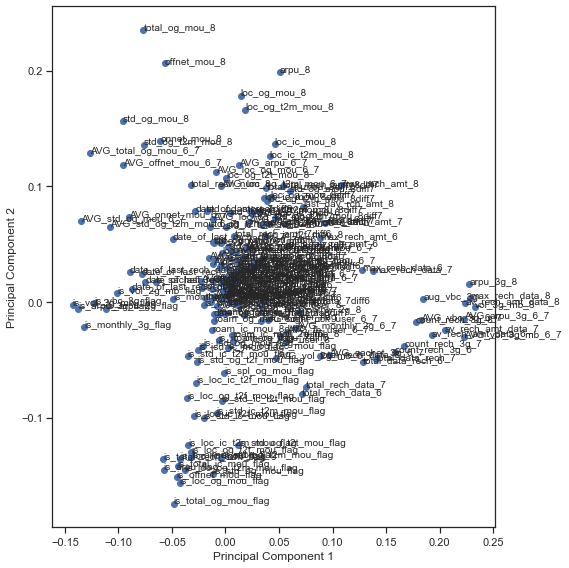

In [102]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show() 

In [103]:
pca.explained_variance_ratio_ 

array([5.72542496e-02, 5.30040773e-02, 3.96202627e-02, 3.27249924e-02,
       2.67517108e-02, 2.16444290e-02, 2.05534967e-02, 1.81233011e-02,
       1.69606753e-02, 1.58205704e-02, 1.51362416e-02, 1.48575701e-02,
       1.46514575e-02, 1.39369915e-02, 1.33901983e-02, 1.30268813e-02,
       1.28896087e-02, 1.24625263e-02, 1.24020292e-02, 1.17553018e-02,
       1.12321316e-02, 1.10904986e-02, 1.05755700e-02, 1.05238194e-02,
       1.03221997e-02, 1.00778841e-02, 9.89442911e-03, 9.78126001e-03,
       9.47208656e-03, 9.33193604e-03, 9.29338379e-03, 8.91008524e-03,
       8.76390185e-03, 8.68362115e-03, 8.42789355e-03, 8.31460103e-03,
       8.09565089e-03, 7.97542628e-03, 7.87962084e-03, 7.63360768e-03,
       7.55525324e-03, 7.48349277e-03, 7.40237273e-03, 7.28283112e-03,
       7.19015253e-03, 7.09227131e-03, 6.85071453e-03, 6.74318274e-03,
       6.55467770e-03, 6.42438028e-03, 6.40417202e-03, 6.35940059e-03,
       6.10320540e-03, 6.05198463e-03, 5.99680660e-03, 5.94056473e-03,
      

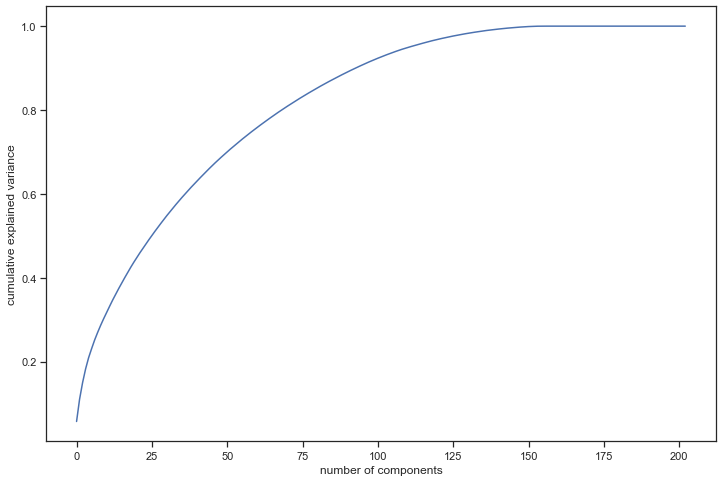

In [133]:
# Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()  

In [105]:
print("pca.explained_variance_ratio_: ",pca.explained_variance_ratio_.round(3)*100) 

pca.explained_variance_ratio_:  [5.7 5.3 4.  3.3 2.7 2.2 2.1 1.8 1.7 1.6 1.5 1.5 1.5 1.4 1.3 1.3 1.3 1.2
 1.2 1.2 1.1 1.1 1.1 1.1 1.  1.  1.  1.  0.9 0.9 0.9 0.9 0.9 0.9 0.8 0.8
 0.8 0.8 0.8 0.8 0.8 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.6 0.6 0.6 0.6 0.6
 0.6 0.6 0.6 0.6 0.6 0.6 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4
 0.4 0.4 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.2
 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0. ]


In [106]:
print (pca.explained_variance_ratio_.cumsum()) 

[0.05725425 0.11025833 0.14987859 0.18260358 0.20935529 0.23099972
 0.25155322 0.26967652 0.28663719 0.30245777 0.31759401 0.33245158
 0.34710303 0.36104003 0.37443022 0.38745711 0.40034671 0.41280924
 0.42521127 0.43696657 0.4481987  0.4592892  0.46986477 0.48038859
 0.49071079 0.50078868 0.5106831  0.52046436 0.52993645 0.53926839
 0.54856177 0.55747186 0.56623576 0.57491938 0.58334727 0.59166187
 0.59975752 0.60773295 0.61561257 0.62324618 0.63080143 0.63828493
 0.6456873  0.65297013 0.66016028 0.66725255 0.67410327 0.68084645
 0.68740113 0.69382551 0.70022968 0.70658908 0.71269229 0.71874427
 0.72474108 0.73068164 0.73646045 0.74217734 0.74779682 0.75333648
 0.75880071 0.76413383 0.76942109 0.77463349 0.77981653 0.78493986
 0.78996588 0.79489648 0.79976687 0.80456553 0.80924873 0.81386545
 0.81844503 0.8229878  0.82749499 0.83188368 0.8362245  0.84051012
 0.84471812 0.84891252 0.85306403 0.85712492 0.86111775 0.86503074
 0.86890183 0.87269768 0.87644655 0.88017831 0.88387568 0.8875

In [107]:
# Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=54) 

In [108]:
# train the model
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape 

(22495, 54)

In [109]:
# creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose()) 

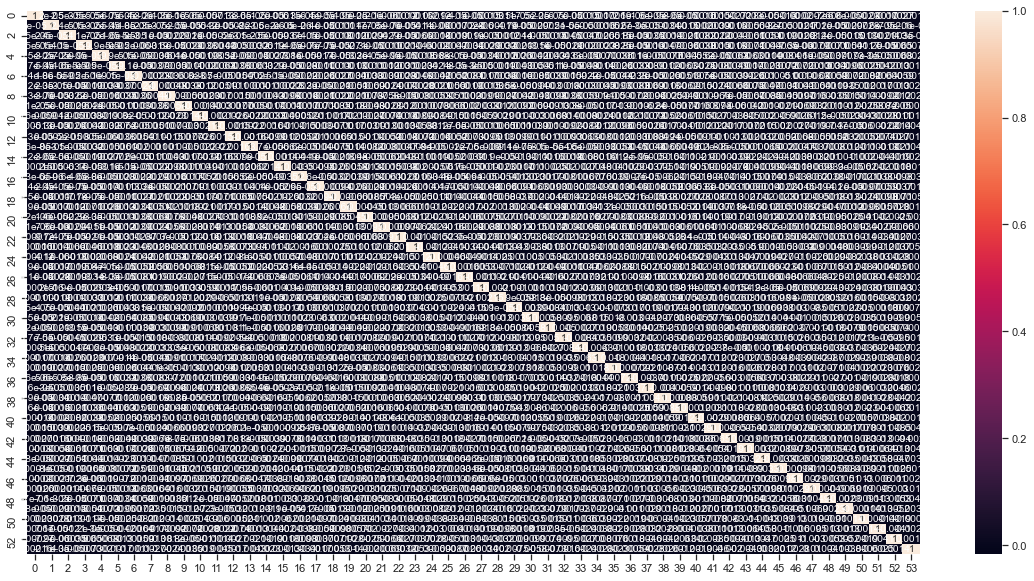

In [112]:
# plotting heatmap
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True) 

In [113]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0 

max corr: 0.019248117629508888 , min corr:  -0.017051451779591904


In [114]:
# transform test data
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape 

(5624, 54)

In [127]:
# Create plotLiftChart
def plotLiftChart(actual, predicted,title_str):
    df_dict = {'actual': list (actual), 'pred': list(predicted)}
    df = pd.DataFrame(df_dict)
    pred_ranks = pd.qcut(df['pred'].rank(method='first'), 100, labels=False)
    actual_ranks = pd.qcut(df['actual'].rank(method='first'), 100, labels=False)
    pred_percentiles = df.groupby(pred_ranks).mean()
    actual_percentiles = df.groupby(actual_ranks).mean()
    plt.title(title_str)
    plt.plot(np.arange(.01, 1.01, .01), np.array(pred_percentiles['pred']),
             color='darkorange', lw=2, label='Prediction')
    plt.plot(np.arange(.01, 1.01, .01), np.array(pred_percentiles['actual']),
             color='navy', lw=2, linestyle='--', label='Actual')
    plt.ylabel('Target Percentile')
    plt.xlabel('Population Percentile')
    plt.xlim([0.0, 1.0])
    plt.ylim([-0.05, 1.05])
    from pylab import rcParams
    rcParams['figure.figsize'] = 10, 4

    plt.legend(loc="best")
    plt.show() 

### Logistic Regression - with penalty 

In [117]:
# import RFE and LogisticRegression
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LogisticRegression 

In [118]:
# make model
logmodel_CW_dict = LogisticRegression(class_weight='balanced',penalty='l2',random_state=9999,solver='newton-cg',C=10000000,n_jobs=-1)

In [119]:
# fit model
logmodel_CW_dict.fit(df_train_pca,y_train) 

LogisticRegression(C=10000000, class_weight='balanced', n_jobs=-1,
                   random_state=9999, solver='newton-cg')

              precision    recall  f1-score   support

           0       0.98      0.78      0.87      5224
           1       0.22      0.79      0.34       400

    accuracy                           0.78      5624
   macro avg       0.60      0.78      0.60      5624
weighted avg       0.93      0.78      0.83      5624

Accuracy for the test dataset 78.1%
ROC for the test dataset 78.3%


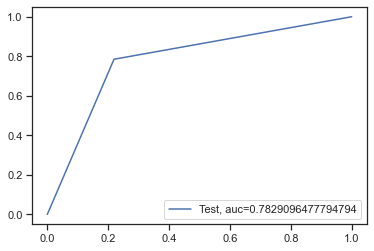

In [120]:
# get precision and recall
predictions = logmodel_CW_dict.predict(df_test_pca)
prediction_probs = logmodel_CW_dict.predict_proba(df_test_pca)[:,1]
print(classification_report(y_test, predictions))
accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show() 

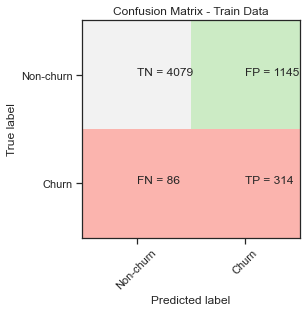

In [121]:
# get and plot confusion matrix
cm = confusion_matrix(y_test, predictions)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Train Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show() 

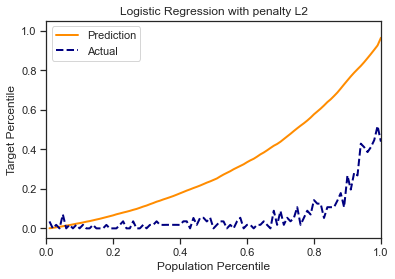

In [128]:
# plot a plotLiftChart
plotLiftChart(y_test.values,prediction_probs,"Logistic Regression with penalty L2") 

### Random Forest 
<br>

Random forest algorithm is based on a concept called bagging - bootstrap aggregating. In random forest, we build a number of decision trees on bootstrap training samples. The samples are chosen, as split candidates from all the X variables (predictors). <br>
So, the random forest at each split is allowed to consider a subset of the predictors. If not, One or Few strong predictors, might always become the most important predictor leading to similar looking trees. Which leads to no reduction in the variance. This process can be thought of as de-correlating the trees or feature bagging. Because of this, the Random forest can also be used to rank the importance of variables. <br>
Similarly bootstrapping of sample rows is also done. <br>


Let's first fit a random forest model with default hyperparameters. 

In [123]:
# create a random forest
from sklearn.ensemble import RandomForestClassifier
RFC_balanced = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None,
                                      min_samples_split=500, min_samples_leaf=1, 
                                      min_weight_fraction_leaf=0.0, max_features='auto', 
                                      max_leaf_nodes=None, min_impurity_split=1e-07,
                                      bootstrap=True, oob_score=False, n_jobs=-1, 
                                      random_state=9999, verbose=0, warm_start=False, 
                                      class_weight="balanced_subsample") 

In [124]:
# fit the model
TrainedRFC= RFC_balanced.fit(df_train_pca,y_train) 

              precision    recall  f1-score   support

           0       0.97      0.83      0.90      5224
           1       0.24      0.68      0.35       400

    accuracy                           0.82      5624
   macro avg       0.60      0.75      0.62      5624
weighted avg       0.92      0.82      0.86      5624

Accuracy for the test dataset 82.1%
ROC for the test dataset 83.8%


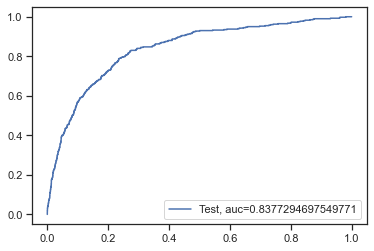

In [125]:
# get precision and recall
preds_RFC=TrainedRFC.predict(df_test_pca)
preds_probs_RFC=TrainedRFC.predict_proba(df_test_pca)[:,1]

print(classification_report(y_test, preds_RFC))
accuracy = metrics.accuracy_score(y_test, preds_RFC)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_probs_RFC)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show() 

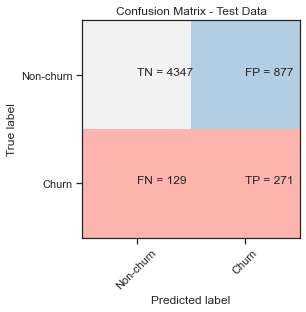

In [126]:
# get and plot confusion matrix
cm = confusion_matrix(y_test, preds_RFC)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show() 

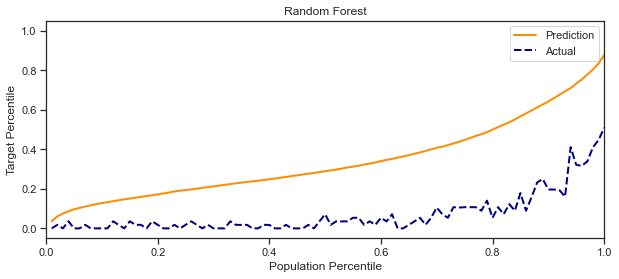

In [129]:
# plot a plotLiftChart
plotLiftChart(y_test.values,preds_probs_RFC,"Random Forest") 

In [130]:
# get feature importance
importances = TrainedRFC.feature_importances_
col_names =  X.columns

sorted_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns={'colName','value'})
sorted_feature_importance 

,colName,value
0,0.34,onnet_mou_8
1,0.12,roam_ic_mou_8
2,0.07,arpu_8
3,0.04,roam_og_mou_8
4,0.04,offnet_mou_8
5,0.03,loc_og_mou_8
6,0.02,std_ic_t2f_mou_8
7,0.02,spl_ic_mou_8
8,0.02,total_rech_num_8
9,0.02,std_og_mou_8
